#### TP d'Initiation au Machine Learning : Régression Linéaire pour la Progression du Diabète

###
TP d'Initiation au Machine Learning : Régression Linéaire pour la Progression du Diabète
Dans ce TP, nous allons explorer les bases du machine learning en utilisant la régression linéaire pour prédire la progression de la maladie du diabète en fonction de l'indice de masse corporelle (BMI).


### 1. Introduction
Dans le domaine du machine learning, la régression linéaire est l'un des algorithmes les plus simples et les plus utilisés. Elle est souvent utilisée pour prédire une valeur continue en fonction d'une ou plusieurs variables d'entrée. Dans ce TP, nous allons utiliser la régression linéaire pour prédire la progression de la maladie du diabète en fonction de l'indice de masse corporelle (BMI).

###  2. Chargement et Inspection du Jeu de Données
Nous commençons par charger le jeu de données sur le diabète à partir de la bibliothèque scikit-learn. Ce jeu de données comprend des informations sur différents attributs médicaux des patients diabétiques, y compris l'âge, le sexe, le BMI, la pression artérielle, etc.
Jeu de données sur le diabète : https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

Attributs
- Âge
- Sexe
- Indice de masse corporelle
- Pression artérielle moyenne
- S1
- S2
- S3
- S4
- S5
- S6

In [5]:
from sklearn import datasets ## importe les jeux de données depuis scikit-learn
data = datasets.load_diabetes() ## charge le jeu de données sur le diabète depuis la bibliothèque de jeux de données 

In [6]:
import numpy as np
import pandas as pd
# définit les données/prédicteurs comme les noms de caractéristiques prédéfinis 
df = pd.DataFrame(data.data, columns=data.feature_names)

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [8]:
# Met la cible (valeur du diabète) dans un autre DataFrame
target = pd.DataFrame(data.target, columns=["Disease Progression"])

In [9]:
target.head()

,Disease Progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


## 3. Régression Linéaire avec scipy
Nous utilisons la bibliothèque scipy pour effectuer une régression linéaire univariée entre l'indice de masse corporelle (BMI) et la progression de la maladie du diabète.

Nous utilisons le modèle de régression linéaire pour prédire la progression de la maladie du diabète en fonction de l'indice de masse corporelle. Nous traçons également le nuage de points des données réelles et la ligne de régression obtenue à partir du modèle.

In [10]:
from scipy import stats
import numpy as np
## Construction du modèle
X = df["bmi"]
Y = target["Disease Progression"]
model = stats.linregress(X,Y)

### Définition de la fonction d'erreur relative moyenne absolue
Cette fonction calcule l'erreur relative moyenne absolue entre deux ensembles de valeurs. C'est une mesure couramment utilisée pour évaluer la précision d'un modèle de régression. Elle est définie comme la moyenne des valeurs absolues des différences relatives entre les valeurs prédites et les valeurs réelles, exprimée en pourcentage.

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [11]:
from sklearn import metrics
## Évaluation du modèle
prediction = model.slope * X + model.intercept
mae= metrics.mean_absolute_error(Y,prediction)
mse = metrics.mean_squared_error(Y,prediction)
mape = mean_absolute_percentage_error(Y,prediction)

print("Mean Absolute Error " ,  mae)
print("Mean Square Error " , mse)
print("Mean Absolute Percentage Error " , mape)

Mean Absolute Error  51.798627639533656
Mean Square Error  3890.456585461273
Mean Absolute Percentage Error  47.68737307027123


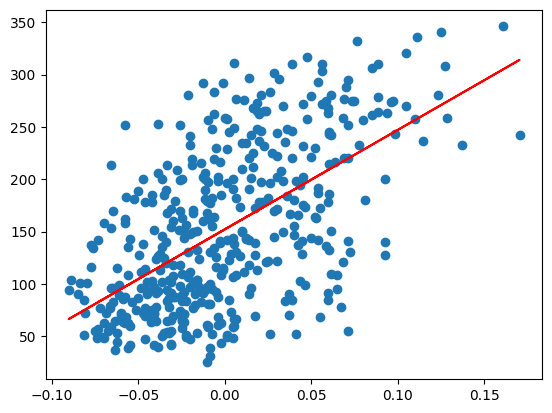

In [15]:
import matplotlib.pyplot as plt
# Visualisation de la régression linéaire
fitLine = model.slope * X + model.intercept
plt.scatter(X, Y)
plt.plot(X, fitLine, c='r')
plt.show()

In [16]:
def predict(x):
    return model.slope * x + model.intercept

In [17]:
predict(0.05)

199.60524718209808

## 4. Utilisation de Statsmodels


Dans cette partie, nous utilisons la bibliothèque statsmodels pour effectuer une régression linéaire. Nous ajustons un modèle de régression linéaire ordinaire (OLS) à nos données et obtenons des statistiques détaillées sur le modèle, telles que les valeurs de coefficient, les p-values et les statistiques de test.

In [ ]:
import statsmodels.api as sm
# Construction du modèle
X = df["bmi"]
Y = target["Disease Progression"]

model = sm.OLS(Y, X).fit()
# Évaluation du modèle
prediction = model.predict(X) 

model.summary()

In [20]:
from sklearn import metrics
mae= metrics.mean_absolute_error(Y,prediction)
mse = metrics.mean_squared_error(Y,prediction)
mape = mean_absolute_percentage_error(Y,prediction)

print("Mean Absolute Error " ,  mae)
print("Mean Square Error " , mse)
print("Mean Absolute Percentage Error " , mape)

Mean Absolute Error  152.1913410361263
Mean Square Error  27035.053589003444
Mean Absolute Percentage Error  111.40325793778625


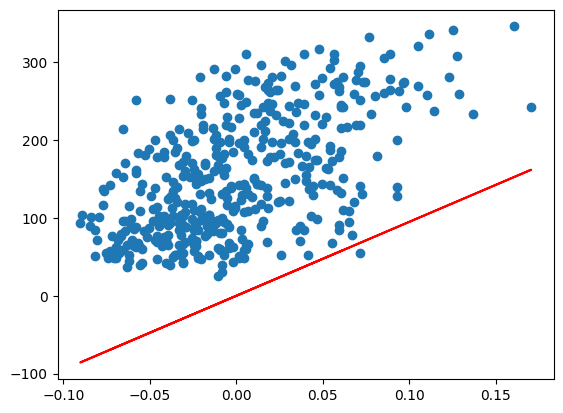

In [21]:
import matplotlib.pyplot as plt2
fitLine =  prediction
plt2.scatter(X, Y)
plt2.plot(X, fitLine, c='r')
plt2.show()

In [22]:
model.predict(0.01)

array([9.4943526])

### 5. Utilisation de sklearn
Enfin, nous utilisons la bibliothèque scikit-learn pour effectuer une régression linéaire et évaluer le modèle.

In [23]:
from sklearn.linear_model import LinearRegression

# Construction du modèle
X1 = np.array(X).reshape(-1,1)
Y1 = np.array(Y)
model = LinearRegression().fit(X1,Y1)

In [24]:
from sklearn import metrics
# Évaluation du modèle
prediction = model.predict(X1)
mae= metrics.mean_absolute_error(Y1,prediction)
mse = metrics.mean_squared_error(Y1,prediction)
mape = mean_absolute_percentage_error(Y1,prediction)

print("Mean Absolute Error " ,  mae)
print("Mean Square Error " , mse)
print("Mean Absolute Percentage Error " , mape)

Mean Absolute Error  51.798627639533656
Mean Square Error  3890.456585461273
Mean Absolute Percentage Error  47.68737307027122


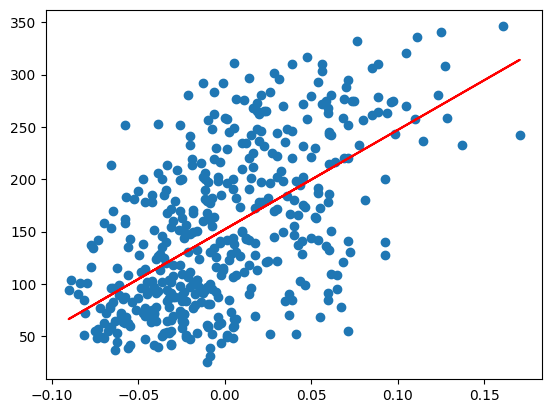

In [25]:
import matplotlib.pyplot as plt2
fitLine =  prediction
plt2.scatter(X, Y)
plt2.plot(X, fitLine, c='r')
plt2.show()

In [26]:
def predicLR(x):
    return model.coef_*x + model.intercept_

predicLR(0.05)

array([199.60524718])